In [16]:
#Step 1:  Importing Packages

In [1]:
import pandas as pd #for Reading CSV file
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt #used for plotting graphs

In [2]:
#Step 2: Importing Excel Sheet And Reading the Values

In [3]:
dataset=pd.read_csv('NewDelhi_Air_quality.csv') #reading csv file and storing in dataframe
#print(dataset)
df = pd.DataFrame(dataset)
cols = [1,2,4,6,7,8]#-----fetching these columns (AQI, CO, no2, pm10, pm25 and so2) as mentioned in problem statement
df = df[df.columns[cols]]
#print(df)

In [20]:
#Step 3: Examine the dataset to determine number of explanatory variables

In [21]:
df.head()

,AQI,CO,no2,pm10,pm25,so2
0,30.2,198.60268,0.046857,10.486722,5.637410,0.387430
1,28.2,197.60132,0.046456,10.719325,4.618169,0.409782
2,26.6,198.60268,0.046857,11.155578,3.520902,0.402331
3,25.0,201.94054,0.048196,11.116206,2.225919,0.376254
4,26.0,205.27840,0.048865,10.405250,1.979471,0.339001


In [22]:
df.describe() # Useful in this context due to us having so much data - we can see the range of the values in each columns...

,AQI,CO,no2,pm10,pm25,so2
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,26.180556,200.095443,0.041996,9.115038,2.295406,0.363423
std,3.054650,4.515537,0.010940,1.531785,0.656507,0.044664
min,19.000000,191.926960,0.015563,6.686746,1.633373,0.283122
25%,25.000000,197.434427,0.037988,7.864763,1.828729,0.320375
50%,27.000000,200.271600,0.045518,8.914176,2.201811,0.372529
75%,28.000000,203.609470,0.050204,10.274836,2.522210,0.395812
max,32.000000,208.616260,0.060914,12.845977,5.637410,0.454485


In [23]:
#Principal component analysis (PCA)

In [24]:
#Step 4: Fitting a PCA model to the data using the same number of components as you have explanatory variables.

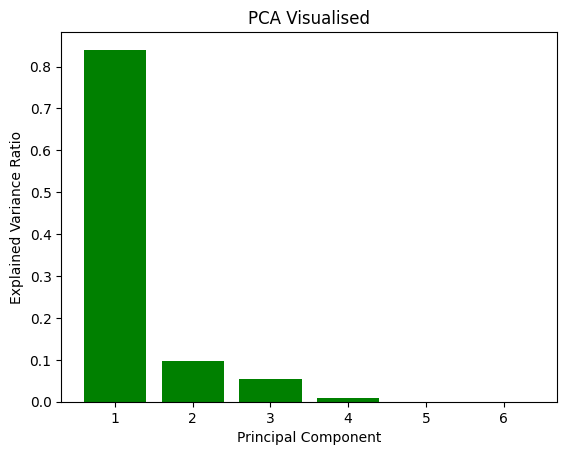

In [25]:
pca = PCA(n_components = 6) # Creating a PCA model using total variables (explanatory or not).
pca.fit(df) # Fit the data...

# Let's plot the explained_variance_ratio_ in a similar manner to the lecture slides...
plt.bar(range(1,7), pca.explained_variance_ratio_, color='green') # Plot on the line graphs...
plt.title("PCA Visualised") # Show the title
plt.xlabel('Principal Component') # Show the x axis label
plt.ylabel('Explained Variance Ratio') # Show the y axis label
plt.xticks([1, 2, 3, 4, 5, 6]) # Set the x axis range and values
plt.show() # Show the graph.

### Discussion: <br>
<ul>
  <li>The above chart descibes about the principal component VS variance ratio.</li>
 <li>It shows how much of the variance in the dataset is explained by the principal components.</li>
 <li>From the graph we can say that the 1st component has maximum information regarding the dataset.</li>
  <li>The 2nd, 3rd and 4th component has few information as compared to rest.</li>
        </ul>

In [26]:
#Step 5: Inspecting the properties explained_variance_ratio_ in pca. 

In [27]:
print(pca.explained_variance_ratio_) # Inspect the properties of explained_variance_ratio_

[8.40191960e-01 9.79548573e-02 5.41305157e-02 7.70816431e-03
 1.31723371e-05 1.33000916e-06]


In [28]:
# From the above observation,
# We can say that the explained variance states that how much information a variance can be attributed to each principal components. We can also say that explained variance presents the information explained using particular principal components.

In [29]:
# Step 6: Inspecting components in pca. 

In [30]:
print(pca.components_) # Inspect components_

[[-5.22452363e-01 -8.49760789e-01 -1.47808025e-03  1.52531156e-02
   6.83103131e-02  6.99914801e-03]
 [ 6.51143633e-01 -3.77866340e-01  1.97854413e-03  6.44008410e-01
   1.35927344e-01 -1.41720428e-03]
 [-5.47137035e-01  3.48979599e-01  6.01155742e-04  7.60709767e-01
  -1.30591072e-02 -2.01329464e-03]
 [-6.05413032e-02  1.15452797e-01 -2.67332163e-03 -7.94703572e-02
   9.87832627e-01  2.94858986e-02]
 [-5.11936009e-03 -2.67619537e-03 -7.03889232e-02 -4.53620105e-03
   2.92050809e-02 -9.97064951e-01]
 [ 2.25944065e-03  5.99403382e-04 -9.97512803e-01  2.24629388e-03
  -4.54769998e-03  7.02639035e-02]]


In [31]:
# From the above observation,
# The attribute 'pca.components_' is a set of all eigen vectors for projection space i.e., one eigen vector each principal components. The need of eigen vector is because it points in the direction of maximum variance.

In [32]:
# Step 7: Use PCA to project the data down into 2D space.

# The easiest way to do this is to fit a new PCA model with 2 components and using the model to transform the data.

In [33]:
pca = PCA(n_components = 2)             # Creating a PCA model using 2 components
new_data = pca.fit_transform(df)      # Fit and transform the data...
print("Shape of the new data is: " + str(new_data.shape))
#new_data

Shape of the new data is: (72, 2)


In [34]:
print(pca.explained_variance_ratio_) # Inspect the properties of explained_variance_ratio_
# needed to represent a certain percentage of the total variance in the data.

[0.84019196 0.09795486]


In [35]:
# Step 8: Plot a scatter graph of the data

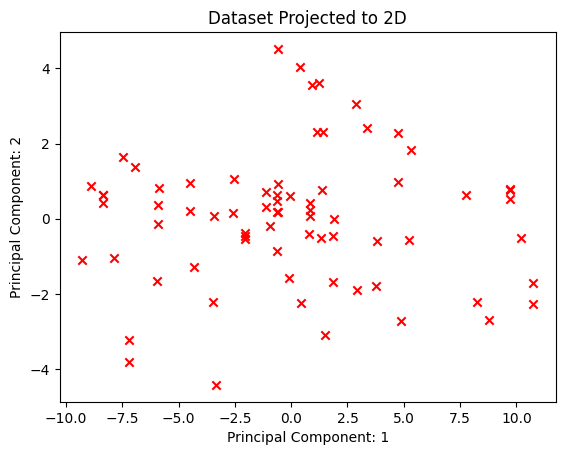

In [36]:
plt.scatter(new_data[:,0], new_data[:,1], color="red", marker="x")
plt.title("Dataset Projected to 2D")
plt.xlabel('Principal Component: 1') # Show the x axis label
plt.ylabel('Principal Component: 2') # Show the y axis label
plt.show() # Show the graph

### `Result`: I `disagree` with colleague because based on the above observation, we get high variance with taking 3 components.<br> The percentage from 1st component is approx 84% variance, with 2nd component its appox 9.8% variance, with 3rd component its approx 5.4% variance. if we consider 1st component only, we get 84%. <br> if we merge 1st and 2nd component, we get 93.8%.<br> if we merge 1st, 2nd and 3rd component, we get 98.8%. <br>So it is better to use 3 components to get better results for given dataset.